In [51]:
%load_ext hierarchymagic
import graphviz
import csv
import json

The hierarchymagic extension is already loaded. To reload it, use:
  %reload_ext hierarchymagic


In [117]:
chapter_graph = graphviz.Graph()

with open('chapters.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        names = json.loads(row['list_of_names'])
        places = json.loads(row['list_of_places'])
        for n in names:
            chapter_graph.edge(row['chapter'], n)
        for p in places:
            chapter_graph.edge(row['chapter'], p)

In [118]:
%dotstr -f svg
chapter_graph

In [164]:
devils_graph = graphviz.Graph(engine='twopi')

devils_graph.graph_attr = {"bgcolor": "black"}
devils_graph.edge_attr = {'color': "white"}

with open('chapters.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        names = json.loads(row['list_of_names'])
        for n in names:
            if n == "devil":
                devils_graph.node(row['chapter'], fontcolor="white", shape="plaintext")
                for n2 in names:
                    devils_graph.node(n2, fontcolor="red", shape="rectangle", color="red")
                    devils_graph.edge(row['chapter'], n2)
                places = json.loads(row['list_of_places'])
                for p in places:
                    devils_graph.node(p, fontcolor="white", shape="rectangle", color="white")
                    devils_graph.edge(row['chapter'], p)

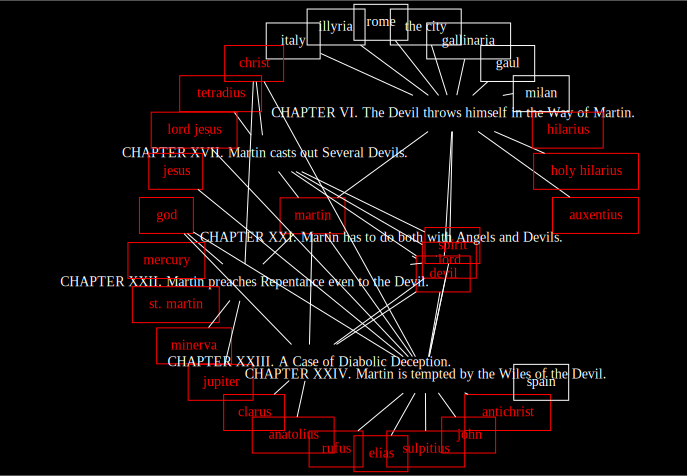

In [165]:
%dotstr -f svg
devils_graph

In [184]:
paulinus_graph = graphviz.Graph(engine='fdp')

paulinus_graph.graph_attr = {"bgcolor": "black"}
paulinus_graph.edge_attr = {'color': "white"}

with open('chapters.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        names = json.loads(row['list_of_names'])
        for n in names:
            if n == "paulinus":
                paulinus_graph.node(row['chapter'], fontcolor="red", shape="rectangle", color="red")
                for n2 in names:
                    paulinus_graph.node(n2, fontcolor="white", shape="circle", color="white")
                    paulinus_graph.edge(row['chapter'], n2)

                    # no places in this two chapters

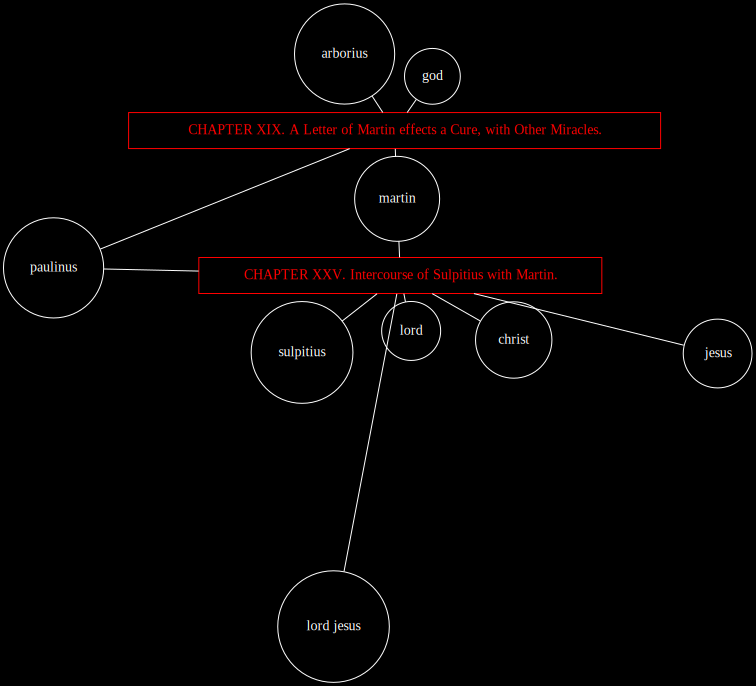

In [185]:
%dotstr -f svg
paulinus_graph